# Libraries

In [16]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Dense, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping

nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
nlp = spacy.load("en_core_web_sm")
pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', 100)
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ARSAMANT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load data

In [18]:
data = pd.read_csv(r"C:\Arunava Docs\Pyspark Resourse\ML\nlp challenge 1\train.csv")
data_test = pd.read_csv(r"C:\Arunava Docs\Pyspark Resourse\ML\nlp challenge 1\test.csv")
data.head(5)

,message,label
0,"K, text me when you're on the way",not-spam
1,Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Infor...,spam
2,"Doing nothing, then u not having dinner w us?",not-spam
3,Gud mrng dear hav a nice day,not-spam
4,"By the way, i've put a skip right outside the front of the house so you can see which house it i...",not-spam


# Delete Null & Blank

In [3]:
data.isnull().sum()
blank = data[data['message'].str.strip() == ''].index.tolist()
blank

[]

# Grouping

In [4]:
grouping = data.groupby('label')['message'].count().reset_index(name='count')
grouping

,label,count
0,not-spam,2542
1,spam,755


# Distibution Ploting

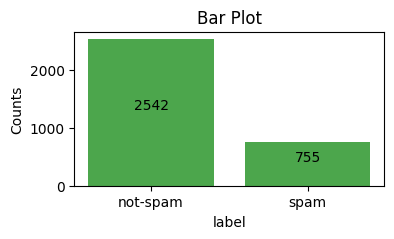

In [5]:
fig = plt.figure(figsize = (4, 2))
bars = plt.bar(grouping['label'], grouping['count'], color='g', alpha=0.7)
plt.title("Bar Plot")
plt.xlabel("label")
plt.ylabel("Counts")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height/2, f'{height}', ha='center', va='bottom')
plt.show()

In [6]:
data['word_length'] = data['message'].str.len()
spam_sms = data[data['label'] == 'spam']
not_spam_sms = data[data['label'] == 'not-spam']

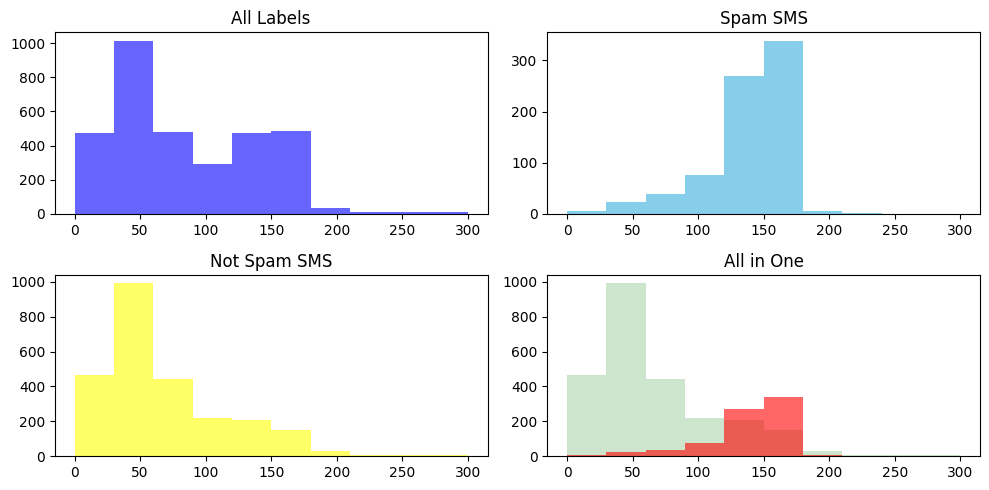

In [7]:
# Plot the distribution of the length of the messages
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # Adjust width for better spacing\
axes = axes.flatten() 
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300]

axes[0].hist(data['word_length'], bins=bins, color='blue', alpha=0.6)
axes[0].set_title("All Labels")

axes[1].hist(spam_sms['word_length'], bins=bins, color='skyblue')
axes[1].set_title("Spam SMS")

axes[2].hist(not_spam_sms['word_length'], bins=bins, color='yellow', alpha=0.6)
axes[2].set_title("Not Spam SMS")

axes[3].hist(not_spam_sms['word_length'], bins=bins, color='green', alpha=0.2)
axes[3].hist(spam_sms['word_length'], bins=bins, color='red', alpha=0.6)
axes[3].set_title("All in One")

plt.tight_layout()
plt.show()

# Remove Stop words

In [8]:
str ='Flatten the array so you can access each subplot individually:'
def remove_stopwords(str):
    doc = nlp(str)
    without=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            without.append(token.text)
    return ' '.join(without)

data['clean_message'] = data['message'].apply(remove_stopwords)
data_test['clean_message'] = data_test['message'].apply(remove_stopwords)
data_test['word_length'] = data_test['message'].str.len()

In [9]:
data.head()

,message,label,word_length,clean_message
0,"K, text me when you're on the way",not-spam,33,K text way
1,Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Infor...,spam,120,nt forget place FREE Requests 1stchoice.co.uk wish Information 08707808226
2,"Doing nothing, then u not having dinner w us?",not-spam,45,u having dinner w
3,Gud mrng dear hav a nice day,not-spam,28,Gud mrng dear hav nice day
4,"By the way, i've put a skip right outside the front of the house so you can see which house it i...",not-spam,122,way skip right outside house house pull


# Split

In [10]:
x = data['word_length']
x = np.array(x).reshape(-1, 1)
y = data['label']

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

# x_train = data['word_length']
# x_train = np.array(x_train).reshape(-1, 1)
# y_train = data['label']

# x_test = data_test['word_length']
# x_test = np.array(x_test).reshape(-1, 1)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(3297, 1)
(3297,)
(2637, 1)
(2637,)
(660, 1)
(660,)


# Machine Leanring

In [12]:
model1 = SVC(verbose=1, random_state=42)
model1.fit(x_train, y_train)

[LibSVM]

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,1


In [13]:
y_pred = model1.predict(x_val)

Accuracy is:  85.3030303030303


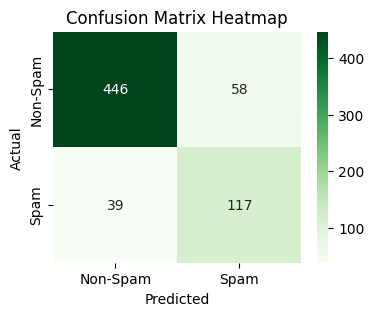

In [14]:
acc = accuracy_score(y_val, y_pred)
print("Accuracy is: ",acc*100)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bag of Words

In [15]:
x = data['clean_message']
y = data['label']

In [16]:
vector = CountVectorizer()
x = vector.fit_transform(x)

In [17]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy is:  97.42424242424242


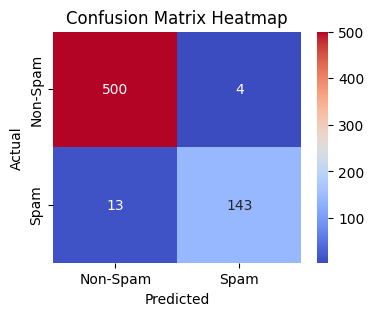

In [19]:
y_pred = model2.predict(x_val)
acc = accuracy_score(y_val, y_pred)
print("Accuracy is: ",acc*100)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# TF-IDF Vectorization

In [20]:
x = data['clean_message']
y = data['label']

In [21]:
vector = TfidfVectorizer()
x = vector.fit_transform(x)

In [22]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy is:  97.72727272727273


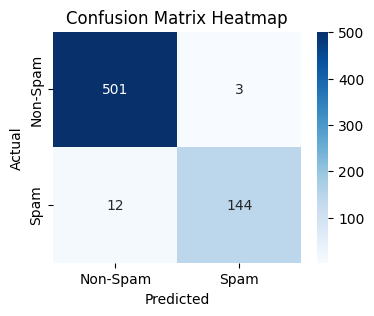

In [24]:
y_pred = model3.predict(x_val)
acc = accuracy_score(y_val, y_pred)
print("Accuracy is: ",acc*100)
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---------------------------------------------------Test with unlabled Data---------------------------------------------------------------

In [25]:
data_test.head(2)
X=data_test['clean_message']
X = vector.transform(X)

In [26]:
predictions = model3.predict(X)

# Add predictions
data_test['Predicted_Label'] = predictions


In [27]:
data_test.head(4)

,message,clean_message,word_length,Predicted_Label
0,Slaaaaave ! Where are you ? Must I summon you to me all the time now ? Don't you wish to come to...,Slaaaaave summon time wish come anymore,120,not-spam
1,Otherwise had part time job na-tuition..,time job na tuition,40,not-spam
2,Don't forget who owns you and who's private property you are ... And be my good boy always .. *p...,forget owns private property good boy passionate kiss,111,not-spam
3,Umma my life and vava umma love you lot dear,Umma life vava umma love lot dear,44,not-spam


In [28]:
grouping = data_test.groupby('Predicted_Label')['message'].count().reset_index(name='count')
grouping

,Predicted_Label,count
0,not-spam,858
1,spam,174


In [27]:
# data_test.to_excel('labeled_data.xlsx', index=False)

# print("Excel file saved as labeled_data.xlsx")

Excel file saved as labeled_data.xlsx


# Deep Learning

In [6]:
texts = data['message'].astype(str).values
labels = data['label'].map({'spam':1, 'not-spam':0}).values

In [12]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2)

In [17]:
#Model: Embedding + Dense
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=100),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, 
          y_train, 
          epochs=20, 
          batch_size=32, 
          validation_split=0.2,
          callbacks=EarlyStopping(verbose=1,patience=3, restore_best_weights=True,monitor='val_loss')
         )

loss, acc = model.evaluate(x_test, y_test)
print(f"Accuracy: {acc:.2f}")

Epoch 1/20


C:\Users\ARSAMANT\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8122 - loss: 0.3781 - val_accuracy: 0.9583 - val_loss: 0.2457
Epoch 2/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9682 - loss: 0.2092 - val_accuracy: 0.9754 - val_loss: 0.1846
Epoch 3/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9919 - loss: 0.1685 - val_accuracy: 0.9792 - val_loss: 0.1754
Epoch 4/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9976 - loss: 0.1543 - val_accuracy: 0.9867 - val_loss: 0.1559
Epoch 5/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - loss: 0.0752 - val_accuracy: 0.9867 - val_loss: 0.0476
Epoch 6/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.0046 - val_accuracy: 0.9867 - val_loss: 0.0518
Epoch 7/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9986 - loss: 0.0031 - val_accuracy: 0.9867 - val_loss: 0.0403
Epoch 8/20
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9867 - val_loss: 0.0531
Epo

In [25]:
texts = data_test['message'].astype(str).values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=100)

In [26]:
predictions = model.predict(X)  # full dataset
predicted_labels = (predictions > 0.5).astype(int).flatten()
data_test['Predicted_Label'] = predicted_labels

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
#------------------------------------------------------THE END--------------------------------------------------------------